In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

notas = pd.read_table("DOM2009.csv", encoding="windows-1252", sep=",")



In [2]:
novatab = notas.iloc[:,[2,28,35,37,41,42,44,58,65]]

In [56]:
novatab = novatab.rename(columns={'V0220':'Celular','V0226':'Televisão_Cores','V2027':'DVD','V0231':'PC','V0232':'PC_internet','V4614':'RendaPc','V4622':'Renda'})
novatab.Celular = novatab.Celular.astype('category')
novatab.UF = novatab.UF.astype('category')
novatab.Televisão_Cores = novatab.Televisão_Cores.astype('category')
novatab.DVD = novatab.DVD.astype('category')
novatab.PC = novatab.PC.astype('category')
novatab.PC_internet = novatab.PC_internet.astype('category')
novatab.Renda = novatab.Renda.astype('category')
novatab.RendaPc = novatab.RendaPc.astype('float')

novatab.UF.cat.categories = ('RO','AC','AM','RR','PA','AP','TO','MA','PI','CE','RN','PB','PE','AL','SE','BA','MG','ES','RJ','SP','PR','SC','RS','MS','MT','GO','DF')
novatab.Celular.cat.categories = ('Sim','Não')
novatab.Televisão_Cores.cat.categories = ('Sim','Não')
novatab.DVD.cat.categories = ('Sim','Não')
novatab.PC.cat.categories = ('Sim','Não')
novatab.PC_internet.cat.categories = ('Sim','Não')
novatab.Renda.cat.categories = ('SR','1/4','1/4-1/2','1/2-1','1-2','2-3', '3-5', '+5', 'Ni')


novatab.loc[(novatab.UF == 'AM')|(novatab.UF == 'RR')|(novatab.UF == 'AP')|(novatab.UF == 'PA')|(novatab.UF == 'TO')|(novatab.UF == 'RO')|(novatab.UF == 'AC'),'Região'] = 'Norte'
novatab.loc[(novatab.UF == 'MA')|(novatab.UF == 'PI')|(novatab.UF == 'CE')|(novatab.UF == 'RN')|(novatab.UF == 'PE')|(novatab.UF == 'PB')|(novatab.UF == 'SE')|(novatab.UF == 'AL')|(novatab.UF == 'BA'),'Região'] = 'Nordeste'
novatab.loc[(novatab.UF == 'MT')|(novatab.UF == 'MS')|(novatab.UF == 'GO'),'Região'] = 'CO'
novatab.loc[(novatab.UF == 'SP')|(novatab.UF == 'RJ')|(novatab.UF == 'ES')|(novatab.UF == 'MG'),'Região'] = 'Sudeste'
novatab.loc[(novatab.UF == 'PR')|(novatab.UF == 'RS')|(novatab.UF == 'SC'),'Região'] = 'Sul'
novatab.loc[(novatab.V4105 == 1)|(novatab.V4105 == 2)|(novatab.V4105 == 3), 'Dom'] = 'Urbano'
novatab.loc[(novatab.V4105 == 4)|(novatab.V4105 == 5)|(novatab.V4105 == 6)|(novatab.V4105 == 7)|(novatab.V4105 == 8), 'Dom'] = 'Rural'


In [61]:
novatab
a = novatab.dropna()
novatab=novatab[(novatab.RendaPc<4000)]

In [23]:
Celular = novatab.Celular.value_counts(True)*100


(0, 100)

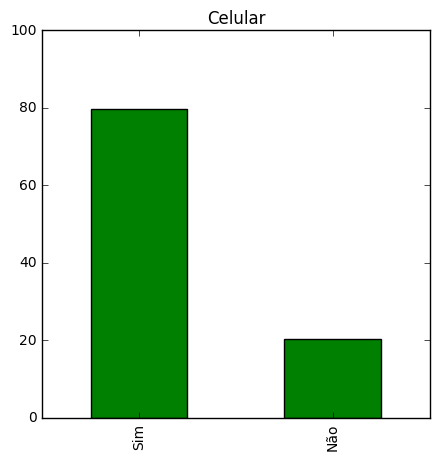

In [24]:
Celular.plot(kind='bar', title = 'Celular', figsize = (5,5), color = ('g','b'))
axes = plt.gca()
axes.set_ylim([0,100])


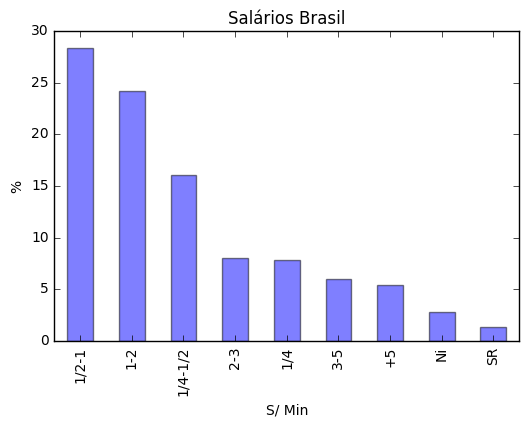

In [25]:
Renda = novatab.Renda.value_counts(True)*100
Renda.plot(kind='bar', alpha = 0.5, title = 'Salários Brasil')
plt.ylabel('%')
plt.xlabel('S/ Min')


In [26]:
ct = pd.crosstab(novatab.Dom, novatab.PC_internet)

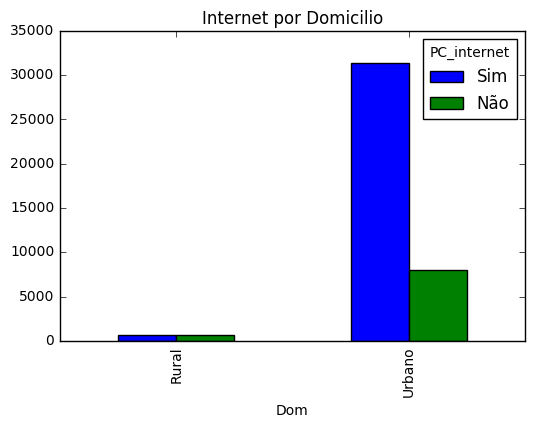

In [27]:
ct.plot(kind = 'bar', title = 'Internet por Domicilio')

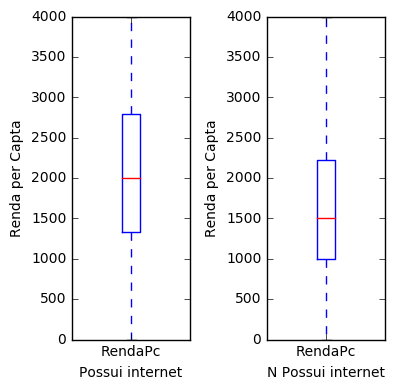

In [64]:
internsim = novatab[novatab.PC_internet == 'Sim']
internao = novatab[novatab.PC_internet == 'Não']

plt.subplot(131)
internsim.RendaPc.plot(kind = 'box')
plt.xlabel('Possui internet')
plt.ylabel('Renda per Capta')

plt.subplot(132)
internao.RendaPc.plot(kind = 'box')
plt.xlabel('N Possui internet')
plt.ylabel('Renda per Capta')

plt.tight_layout()